### Load relevant libraries

In [1]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
from os import path, getcwd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

C:\Users\Bryce\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### identify links on webpage

In [2]:
def get_soup(html):
    resp = requests.get(html)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, from_encoding=encoding)
    return soup

### create list with links from webpage

In [3]:
def get_links(soup):
    http_link_list = [] 
    for link in soup.find_all('a', href=True):
        if link['href'][0] != '/': 
            http_link_list.append(link['href'].strip("'"))
    return http_link_list 

### pull b and td tags from webpage

In [4]:
def get_ps(soup):
    http_link_list = [] 
    for link in soup.find_all('b'):
        http_link_list.append(link.get_text())
    return http_link_list 

In [5]:
def get_ps_td(soup):
    http_link_list = [] 
    for link in soup.find_all('td'):
        http_link_list.append(link.get_text())
    return http_link_list 

### get text from an array

In [6]:
def get_text(text_array):
    text = " ".join(text_array)
    return text

### get text from all interviews in list

In [7]:
def get_interview_text(interview_list):
    text_return = []
    for i in interview_list:
        print(i)
        soup = get_soup(i)
        interview = get_ps_td(soup)[13]
        c = interview.find('Q.')
        d = interview.find('FastScripts')  
        text_array = interview[c+2:d]
        text_return.append(text_array)
    return text_return

### remove punctuation and stop words

In [8]:
def punctuation_stop(text):    
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

### webpage

In [9]:
lj_transcripts = 'http://www.asapsports.com/show_player.php?id=13888'

### get word soup from webpage

In [10]:
soupout = get_soup(lj_transcripts)

### get links from webpage

In [11]:
all_links = get_links(soupout)

### trim links to only interviews

In [12]:
interview_links = all_links[15:-14]

### display title of transcript associated with links

In [13]:
raw_titles = get_ps(soupout)
titles = raw_titles[1::2]

### identify ASG link index

In [14]:
asg_check_list = []
for i in titles:
    asg_check = i.find("ALL-STAR")  
    asg_check_list.append(asg_check)

In [15]:
asg_index = []
i = 0
while i < len(asg_check_list):
    if asg_check_list[i] != -1:
        asg_index.append(i)
        i+=1
    else:
        i+=1

In [16]:
asg_index

[0,
 1,
 2,
 3,
 4,
 22,
 23,
 24,
 25,
 41,
 42,
 59,
 83,
 84,
 85,
 105,
 106,
 129,
 130,
 153,
 173,
 174,
 196,
 197,
 201,
 210,
 211,
 212,
 213,
 231,
 232,
 233,
 234,
 235]

###### after checking website with our indexes, realized one transcript was titled 'ALL STAR' instead of 'ALL-STAR'. As this is just one instance we will simply append the index, however we could have executed another .find() search if the issue occurred more frequently.

In [17]:
asg_index.append(5)

### ASG links

In [18]:
asg_links = []
i = 0
while i < len(asg_index):
    a_i = int(asg_index[i])
    asg_links.append(interview_links[a_i])
    i += 1

### return list of all interview text

In [19]:
text_return_list = get_interview_text(asg_links)
all_text = get_text(text_return_list)

http://www.asapsports.com/show_interview.php?id=183866
http://www.asapsports.com/show_interview.php?id=183867
http://www.asapsports.com/show_interview.php?id=183871
http://www.asapsports.com/show_interview.php?id=173184
http://www.asapsports.com/show_interview.php?id=173143
http://www.asapsports.com/show_interview.php?id=157181
http://www.asapsports.com/show_interview.php?id=157145
http://www.asapsports.com/show_interview.php?id=147131
http://www.asapsports.com/show_interview.php?id=147096
http://www.asapsports.com/show_interview.php?id=137423
http://www.asapsports.com/show_interview.php?id=137375
http://www.asapsports.com/show_interview.php?id=127156
http://www.asapsports.com/show_interview.php?id=116704
http://www.asapsports.com/show_interview.php?id=116663
http://www.asapsports.com/show_interview.php?id=116643
http://www.asapsports.com/show_interview.php?id=106385
http://www.asapsports.com/show_interview.php?id=106285
http://www.asapsports.com/show_interview.php?id=96204
http://www.

### remove punctuation and stop words

In [20]:
filteredtext = punctuation_stop(all_text)

### list of unwanted words

In [21]:
unwanted = ['q', 'game', 'see', 'captioning', 'upcoming', 'events', 'site', 'asap', 'sports', 'transcript', 'contact', 'us', 'products', 'subscribe', 'find', 'lebron', 'james', 'maybe', 'kind', 'coming', 'people', 'think', 'know', 'obviously', 'mean', 'lot', 'a', 'really','mean','little bit','thing','say','go','actually','even','probably','going','said','something','okay','maybe','got']

### remove unwanted words

In [22]:
text = " ".join([ele for ele in filteredtext if ele not in unwanted])

### working dictionary

In [23]:
d = getcwd()

### image file for mask

In [24]:
mask = np.array(Image.open("bballo.png").convert("RGBA"))

### check image format

In [25]:
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

### word cloud object

In [26]:
wc = WordCloud(background_color="white", max_words=300, random_state=1, stopwords=STOPWORDS, mask=mask)

In [27]:
wc.generate(text)

In [28]:
image_colors = ImageColorGenerator(mask)

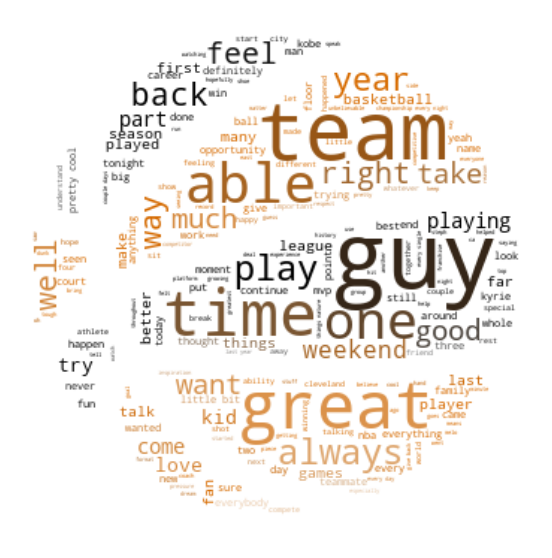

In [29]:
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusion
##### All- Star Game interviews were chosen in anticipation of different themes than those from the post-season. However, it appears the common theme is on track with typical Lebron James interviews. We see 'guy' and 'team' as two of the most common words. Lebron often refers to himself as a 'guy' or 'just a guy' to remind people he is human. James is viewed as one of the best players in history and his 'team' first approach has been evident throughout his entire career. Some notable appearances are Kyrie and Kobe. Mention of both of them does not come as a surprise. Kyrie and Lebron teamed up in Cleveland for a few years and won a championship together. As for Kobe him and Lebron had some what of a rivalry as Kobe is also considered one of the all-time greats. Additionally, Kobe's tragic passing in 2020 influences his mention as well. Lastly, we see 'great', 'time', and 'always' piecing together a common expression of enjoyment during ASG weekend and being able to take a break from regular season activities. 